<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_3_variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split

import numpy  as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from scipy.stats import norm

In [ ]:
def function(x):
  return norm.logpdf(x)

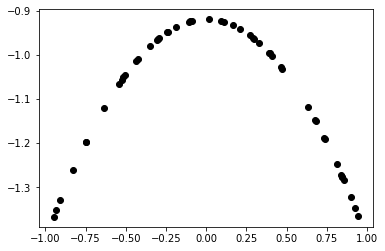

In [ ]:
X = np.random.rand(50,1) * 2 - 1
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
X_train[:2], y_train[:2]
num_train

40

In [ ]:
torch.set_default_dtype(torch.float64)
net = nn.Sequential(
    nn.Linear(inputs, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.ReLU(),
    nn.Linear(50, 50, bias = True), nn.Sigmoid(),
    nn.Linear(50, 1)
)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = .001)

In [ ]:
num_epochs = 20000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1, 1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1, 1)
x_test_t = torch.from_numpy(X_test).clone()
history = []

In [ ]:
for i in range(num_epochs):
    y_pred = net(x_train_t)
    loss = loss_fn(y_train_t,y_pred)
    history.append(loss.data)    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  
    test_loss = loss_fn(y_test_t,net(x_test_t))  
    if i > 0 and i % 2000 == 0:
        print(f'Epoch {i}, loss = {loss:.9f}, test loss {test_loss:.9f}')

Epoch 2000, loss = 0.000000178, test loss 0.000000375
Epoch 4000, loss = 0.000000177, test loss 0.000000388
Epoch 6000, loss = 0.000000175, test loss 0.000000378
Epoch 8000, loss = 0.000000174, test loss 0.000000370
Epoch 10000, loss = 0.000000157, test loss 0.000000358
Epoch 12000, loss = 0.000000152, test loss 0.000000345
Epoch 14000, loss = 0.000000146, test loss 0.000000337
Epoch 16000, loss = 0.000000143, test loss 0.000000339
Epoch 18000, loss = 0.000000135, test loss 0.000000331


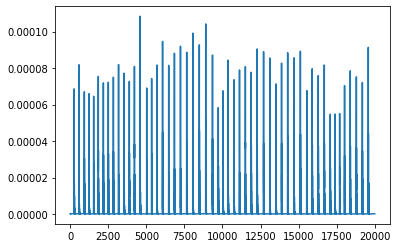

In [ ]:
plt.plot(history)

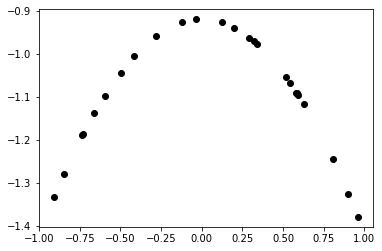

In [ ]:
X_a = torch.rand(25,1).clone() * 2 - 1
y_a = net(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')